<a href="https://colab.research.google.com/github/pra1608/LMP/blob/main/thin_and_thick_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation 2

In [ ]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [ ]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Material Properties of copper

In [ ]:
k= 385.00 # (W/mK)
rho= 8960.00 #(kg/m**3)
C=376.812 #(J/Kg-K)

In [ ]:
lmda= 1064*10**(-9)  # nm
n_c= 0.37863
k_c= 7.0660
n_a= 1.00027398
k_a= 0
# Reflectivity Calculation
R= (((n_c- n_a)**2+(k_c- k_a)**2)/((n_c+ n_a)**2+ (k_c+ k_a)**2))
# Absorption Coefficient
print("Reflectivity:",R)

Reflectivity: 0.9707709284942617


In [ ]:
# Absorption Coefficient
absorp_coff = (4*(numpy.pi)* k_c)/ lmda
#Diffusion cofficient
diffusion_coff = k/(rho*C)
#Pulse Time
tp = 10*10**(-9)
#Heat penetration depth
delta_t = (diffusion_coff*tp)**0.5
#Max Power calculation (in Watt)
I_max = 6*10**3
# taking into account the Factor of Reflectivity (R)
I_0= (1-R)*I_max
print(f"Max Power: {I_0} Watt")
# Scanning Speed
ux = (0.200/60)
print(f"Scanning Velocity:{ux} m/s")


Max Power: 175.37442903442968 Watt
Scanning Velocity:0.0033333333333333335 m/s


# Defining the Geometry of Plate

In [ ]:
x = numpy.linspace(-0.05, 0.05, 100) #  x coordinates of plate

In [ ]:
y = numpy.linspace(-0.05, 0.05, 100) # y coordinates of the plate

In [ ]:
z = numpy.linspace(0, 0.01, 100) # Different values of the Thickness of plates

In [ ]:
xx, yy = numpy.meshgrid(x, y) # mesh grid

In [ ]:
xx

array([[-0.05     , -0.0489899, -0.0479798, ...,  0.0479798,  0.0489899,
         0.05     ],
       [-0.05     , -0.0489899, -0.0479798, ...,  0.0479798,  0.0489899,
         0.05     ],
       [-0.05     , -0.0489899, -0.0479798, ...,  0.0479798,  0.0489899,
         0.05     ],
       ...,
       [-0.05     , -0.0489899, -0.0479798, ...,  0.0479798,  0.0489899,
         0.05     ],
       [-0.05     , -0.0489899, -0.0479798, ...,  0.0479798,  0.0489899,
         0.05     ],
       [-0.05     , -0.0489899, -0.0479798, ...,  0.0479798,  0.0489899,
         0.05     ]])

In [ ]:
yy

array([[-0.05     , -0.05     , -0.05     , ..., -0.05     , -0.05     ,
        -0.05     ],
       [-0.0489899, -0.0489899, -0.0489899, ..., -0.0489899, -0.0489899,
        -0.0489899],
       [-0.0479798, -0.0479798, -0.0479798, ..., -0.0479798, -0.0479798,
        -0.0479798],
       ...,
       [ 0.0479798,  0.0479798,  0.0479798, ...,  0.0479798,  0.0479798,
         0.0479798],
       [ 0.0489899,  0.0489899,  0.0489899, ...,  0.0489899,  0.0489899,
         0.0489899],
       [ 0.05     ,  0.05     ,  0.05     , ...,  0.05     ,  0.05     ,
         0.05     ]])

# Temperature calculation for Thick Plate

In [ ]:
def Tem_thick(X, Y, Z, ux, I_0):
    r = numpy.sqrt(X**2 + Y**2 + Z**2)  
    T = I_0/(2*numpy.pi*r*k)*numpy.exp(-ux*r/(2*diffusion_coff))+300
    return T

In [ ]:
Tem_thick(xx, yy, z[1], ux, I_0).max() # max temperature at 

399.4482039608969

In [ ]:
Tem_thick(xx, yy, z[-1], ux, I_0).max()

306.2457365080472

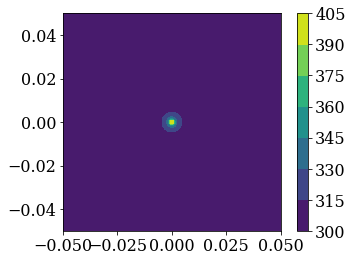

In [ ]:
import matplotlib.pyplot as plt
h = plt.contourf(xx, yy, Tem_thick(xx, yy, z[1], ux,I_0))
plt.axis('scaled')
plt.colorbar()
plt.show()

# Plotting the temperature Data for Thick plates with different Thickness

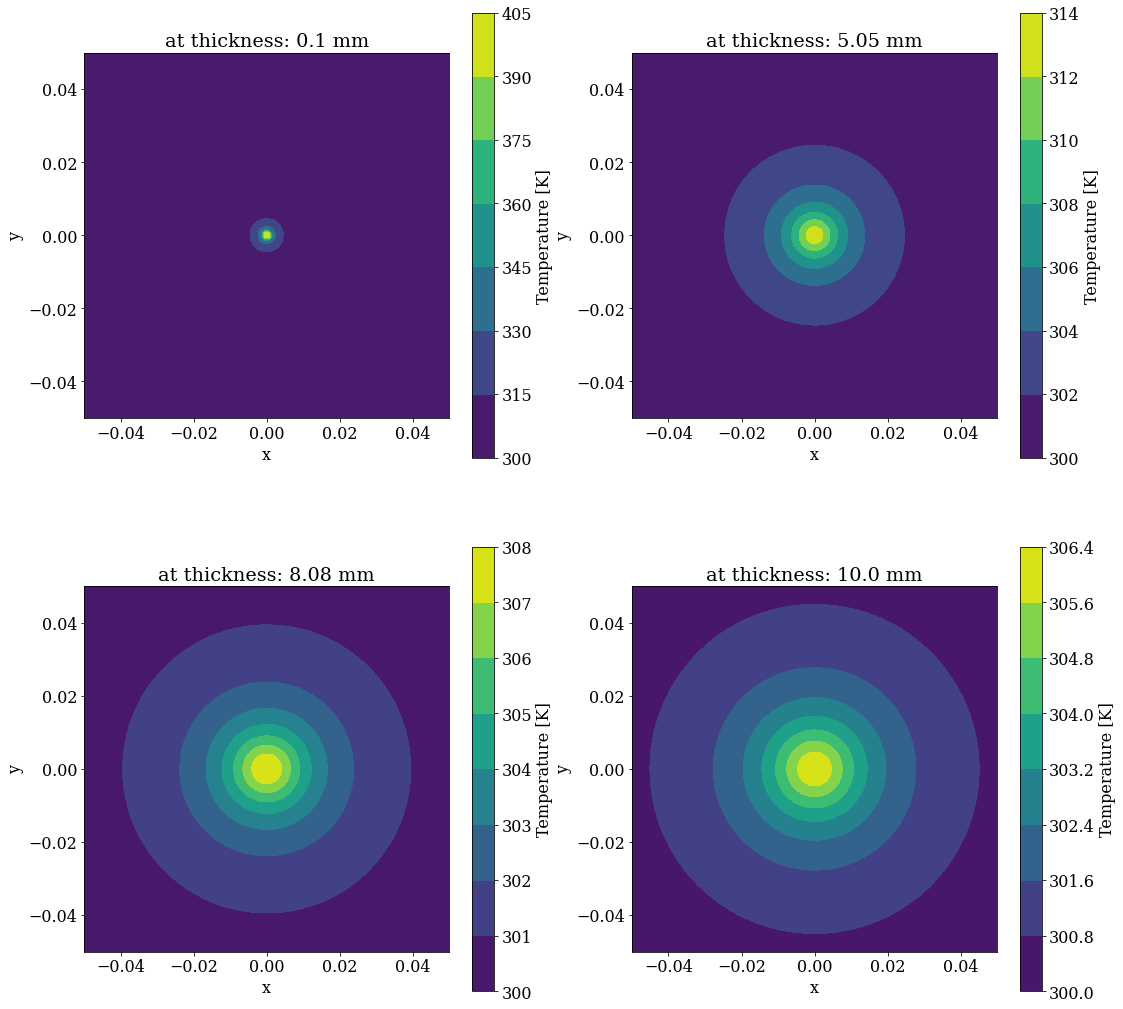

In [ ]:
figure, axis = plt.subplots(2, 2, figsize = (18,18))
  
# For 0.1 mm thick plate
h1 = axis[0, 0].contourf(xx, yy, Tem_thick(xx, yy, z[1], ux, I_0))
axis[0, 0].set_title(f"at thickness: {round((z[1]*1000),2)} mm")
axis[0, 0].axis('scaled') 
axis[0,0].set_xlabel('x')
axis[0,0].set_ylabel('y')
figure.colorbar(h1, ax = axis[0,0], label='Temperature [K]') 
# For 10 mm 
h2 = axis[1, 1].contourf(xx, yy, Tem_thick(xx, yy, z[-1], ux, I_0))
axis[1, 1].set_title(f"at thickness: {round((z[-1]*1000), 2)} mm")
axis[1, 1].axis('scaled')
axis[1,1].set_xlabel('x')
axis[1,1].set_ylabel('y')
figure.colorbar(h2, ax = axis[1,1], label='Temperature [K]')               
# For 5.05 mm
h3 = axis[0, 1].contourf(xx, yy, Tem_thick(xx, yy, z[50], ux, I_0))
axis[0, 1].set_title(f"at thickness: {round((z[50]*1000),2)} mm")
axis[0, 1].axis('scaled') 
axis[0,1].set_xlabel('x')
axis[0,1].set_ylabel('y')
figure.colorbar(h3, ax = axis[0,1], label='Temperature [K]')                
# For 8.08 mm
h4 = axis[1, 0].contourf(xx, yy, Tem_thick(xx, yy, z[-20], ux, I_0))
axis[1, 0].set_title(f"at thickness: {round((z[-20]*1000), 2)} mm")
axis[1, 0].axis('scaled')  
axis[1,0].set_xlabel('x')
axis[1,0].set_ylabel('y')
# Combine all the operations and display
figure.colorbar(h4, ax = axis[1,0], label='Temperature [K]')
plt.show()

# 3D-Temperture profile for 10 mm thick plate

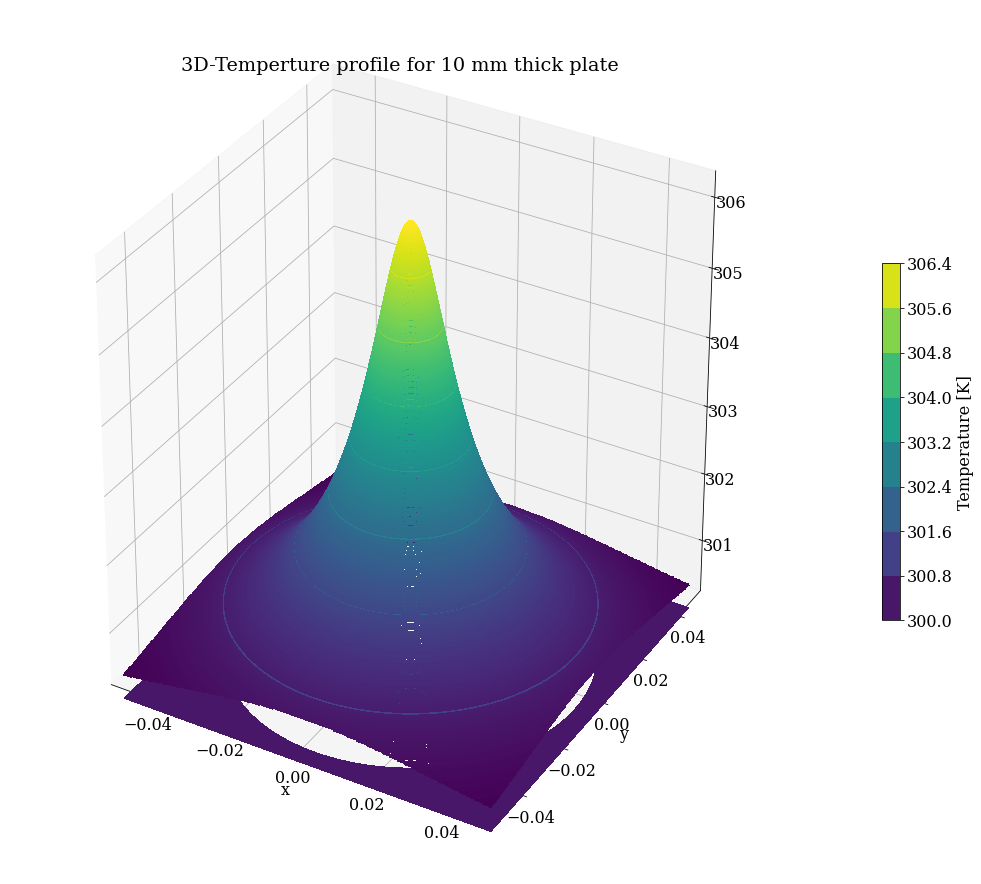

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,16))

ax = plt.axes(projection='3d')
ax.contourf3D(xx, yy, Tem_thick(xx, yy, z[-1], ux, I_0), 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('Tempearture')
ax.set_title('3D-Temperture profile for 10 mm thick plate')
xmin, xmax = xx.min(), xx.max()
ymin, ymax = yy.min(), yy.max()
zmin, zmax = Tem_thick(xx, yy, z[-1], ux, I_0).min(), Tem_thick(xx, yy, z[-1], ux, I_0).max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
C = ax.contourf(
   xx, yy, Tem_thick(xx, yy, z[-1], ux, I_0)
)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Temperature [K]')
ax.dist = 10
plt.show()


# Temperature calculation for Thin Plate


In [ ]:
def K0(u, r, alpha ):
    constant = (u*r/(2*alpha))
    return -(0.5772 + numpy.log(constant/2))
def Tem_thin_plate (x, y,height,k, ux, I_0): # 2D case
    r= numpy.sqrt(x**2+ y**2)
    T= 300 + (((I_0)/(2*(numpy.pi)*k*height))* (numpy.exp(- (ux *x)/(2*diffusion_coff)))* K0(ux, r, diffusion_coff))
    return T

#  Plotting the temperature Data for Thin plates with different Thickness

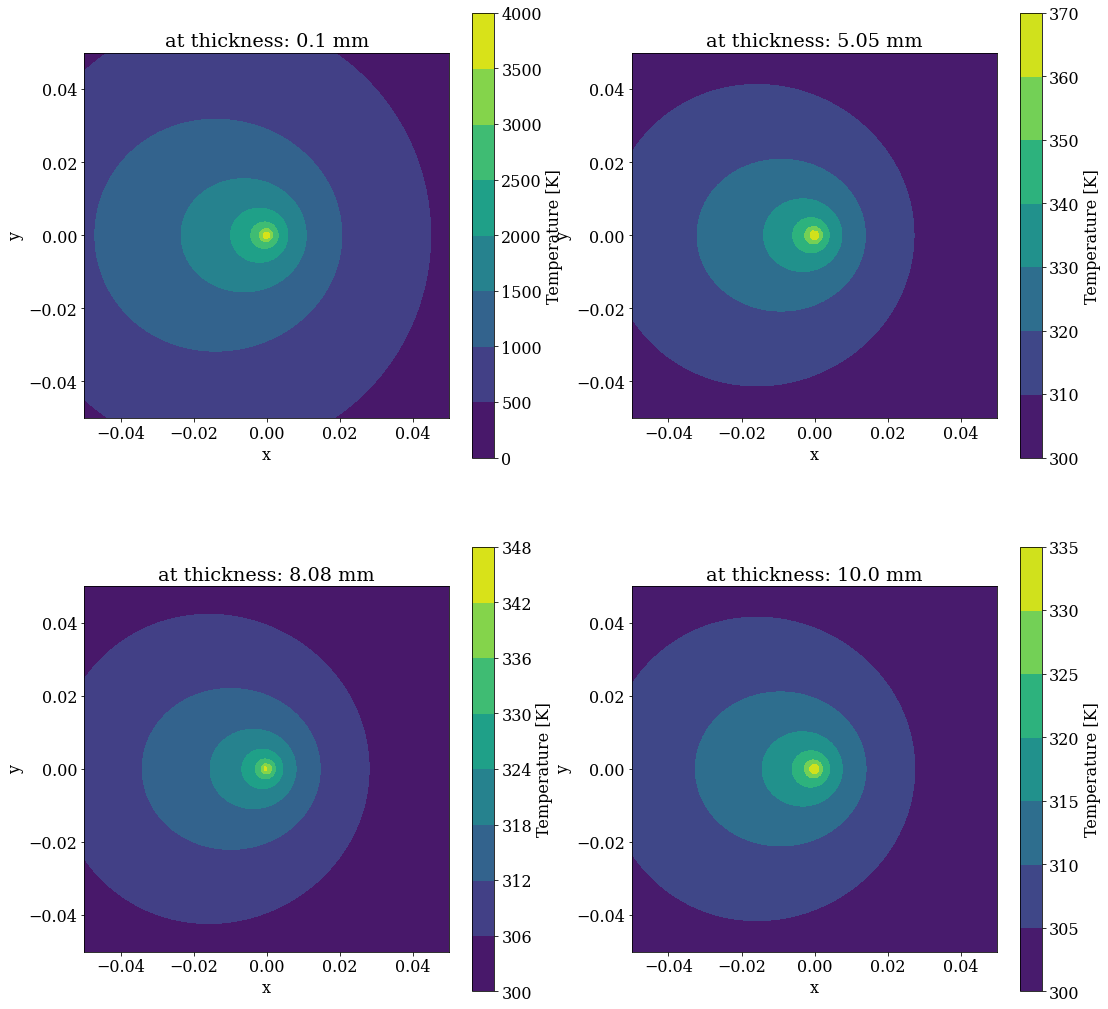

In [ ]:
fig, axis1 = plt.subplots(2, 2, figsize = (18,18))
  
# For 0.1mm
h5 = axis1[0, 0].contourf(xx, yy,Tem_thin_plate (xx, yy, z[1],k, ux, I_0))
axis1[0, 0].set_title(f"at thickness: {round((z[1]*1000),2)} mm")
axis1[0, 0].axis('scaled')
axis1[0,0].set_xlabel('x')
axis1[0,0].set_ylabel('y')
fig.colorbar(h5, ax = axis1[0,0], label='Temperature [K]') 
# For 5.05 mm
h6 = axis1[1, 1].contourf(xx, yy,Tem_thin_plate (xx, yy, z[-1],k, ux, I_0))
axis1[1, 1].set_title(f"at thickness: {round((z[-1]*1000), 2)} mm")
axis1[1, 1].axis('scaled')
axis1[1,1].set_xlabel('x')
axis1[1,1].set_ylabel('y')
fig.colorbar(h6, ax = axis1[1,1],label='Temperature [K]')               
# For 8.08 mm
h7 = axis1[0, 1].contourf(xx, yy,Tem_thin_plate (xx, yy, z[50],k, ux, I_0))
axis1[0, 1].set_title(f"at thickness: {round((z[50]*1000),2)} mm")
axis1[0, 1].axis('scaled') 
axis1[0,1].set_xlabel('x')
axis1[0,1].set_ylabel('y')
fig.colorbar(h7, ax = axis1[0,1],  label='Temperature [K]')                
# For 10 mm
h8 = axis1[1, 0].contourf(xx, yy, Tem_thin_plate (xx, yy, z[-20],k, ux, I_0))
axis1[1, 0].set_title(f"at thickness: {round((z[-20]*1000), 2)} mm")
axis1[1, 0].axis('scaled')  
axis1[1,0].set_xlabel('x')
axis1[1,0].set_ylabel('y')
fig.colorbar(h8, ax = axis1[1,0], label='Temperature [K]')

# Combine all the operations and display
plt.show()

# 3D-Temperture profile for 0.1 mm thick plate 

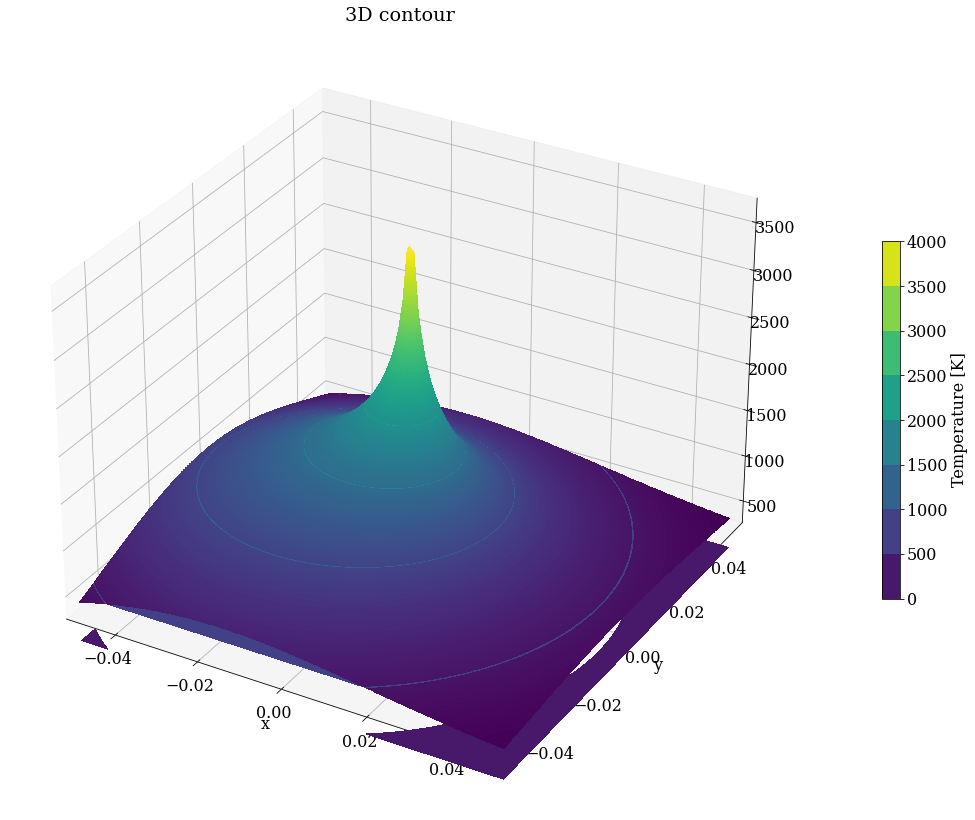

In [ ]:
fig = plt.figure(figsize = (16,16))

ax = plt.axes(projection='3d')
ax.contourf3D(xx, yy, Tem_thin_plate (xx, yy, z[1],k, ux, I_0), 1000, linestyles="solid",)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('Tempearture')
ax.set_title('3D contour')
xmin, xmax = xx.min(), xx.max()
ymin, ymax = yy.min(), yy.max()
zmin, zmax = Tem_thin_plate (xx, yy, z[1],k, ux, I_0).min(), Tem_thin_plate (xx, yy, z[1],k, ux, I_0).max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
C = ax.contourf(
   xx, yy, Tem_thin_plate (xx, yy, z[1],k, ux, I_0)
)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Temperature [K]')
ax.dist = 10
plt.show()


Validity of the model: In Model of thin plate, It is assumed that temperature is constant along the thickness of the plate but varying in x and y direction. As In thin plate the thickess is very small the heat flow is higher in the x and y direction compared to z-direction in compared to the thick plates where the heat flow is assumed to be uniform from the laser spot. So Due to this reason the temperature for different thickness of plates for thin plate is higher compared to the thick plate.

# Range of parameters for which the temperatures at a distance of 1 mm from the center line varies between melting point and normal boiling point temperatures.


#### For Thick plate of 10 mm thickness

In [ ]:
I_0 = (1-R)*numpy.linspace(10**6, 0.20*10**7, 100)
ux = numpy.linspace(0.001, 0.02, 100)
I, u = numpy.meshgrid(I_0, ux)
x = 0
y = 0.001
z_thick = 0.01
Temp_thick = Tem_thick(x, y, z_thick,u, I)

In [ ]:
Temp_thick.max()

2600.944541103441

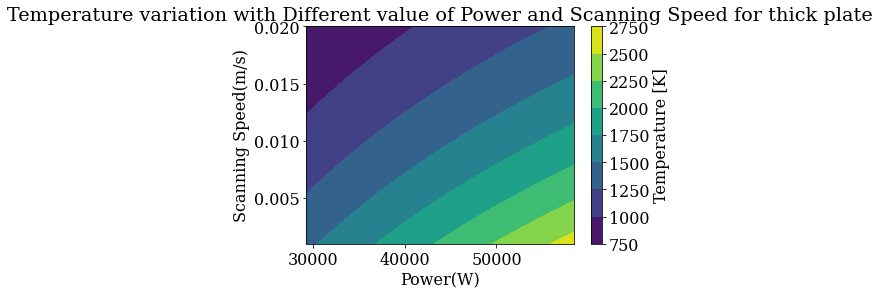

In [ ]:
import matplotlib.pyplot as plt
h = plt.contourf(I, u, Temp_thick)
#plt.axis('scaled')
plt.xlabel('Power(W)')
plt.ylabel('Scanning Speed(m/s)')
plt.title("Temperature variation with Different value of Power and Scanning Speed for thick plate")
plt.colorbar(label='Temperature [K]')
plt.show()

For the Thick plate of size 10 mm, Scanning speed in range of (5 mm/s - 15 mm/s) and Power of (40 KW-50 KW) give the temperature in the range of Melting point and Boiling point at the distance of 1 mm from center line.

#### For Thin plate of 2 mm thickness

In [ ]:
I_0 = (1-R)*numpy.linspace(10**4, 0.7*10**5, 100)
ux = numpy.linspace(0.001, 0.02, 100)
I, u = numpy.meshgrid(I_0, ux)
x = 0
y = 0.001
z_thin = 0.002
Temp_thin = Tem_thin_plate (x, y, z_thin, k, u, I)

In [ ]:
Temp_thin.max()

2645.2500600793683

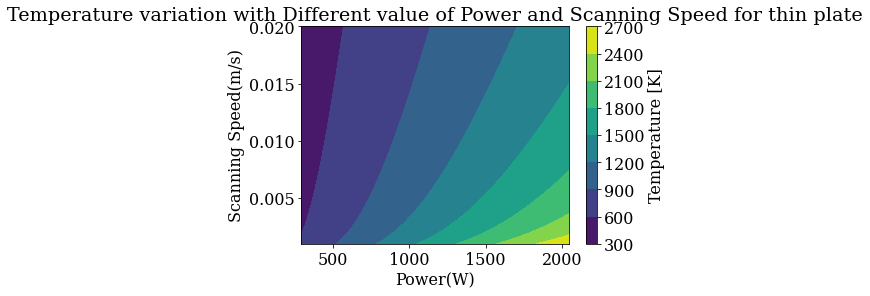

In [ ]:
import matplotlib.pyplot as plt
h = plt.contourf(I, u, Temp_thin)
#plt.axis('scaled')
plt.colorbar(label='Temperature [K]')
plt.xlabel('Power(W)')
plt.ylabel('Scanning Speed(m/s)')
plt.title("Temperature variation with Different value of Power and Scanning Speed for thin plate")
plt.show()

For the Thin plate of size 2 mm, Scanning speed in range of (10 mm/s - 18 mm/s) and Power of (40 KW-50 KW) give the temperature in the range of Melting point and Boiling point at the distance of 1 mm from center line.